<a href="https://colab.research.google.com/github/SrishtiCode/Threat-Detection/blob/main/Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17485, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 17485 (delta 78), reused 30 (delta 30), pack-reused 17378 (from 3)
Receiving objects: 100% (17485/17485), 16.35 MiB | 15.18 MiB/s, done.
Resolving deltas: 100% (11989/11989), done.
/content/yolov5


In [ ]:
#install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00
Setup complete. Using torch 2.4.0+cu121 CPU


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.0+cu121 CPU

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


<IPython.core.display.Javascript object>

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


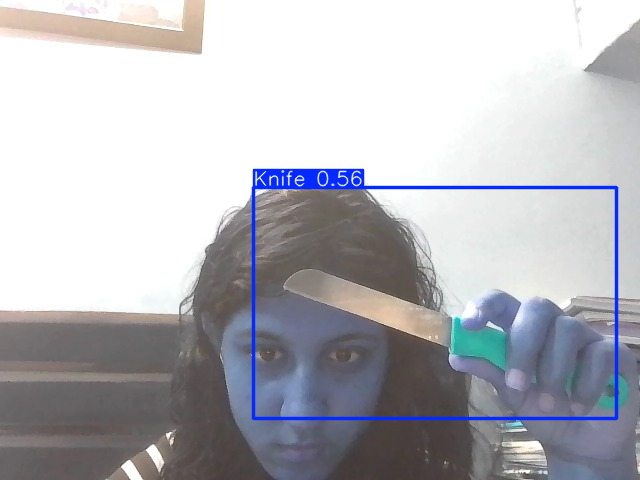

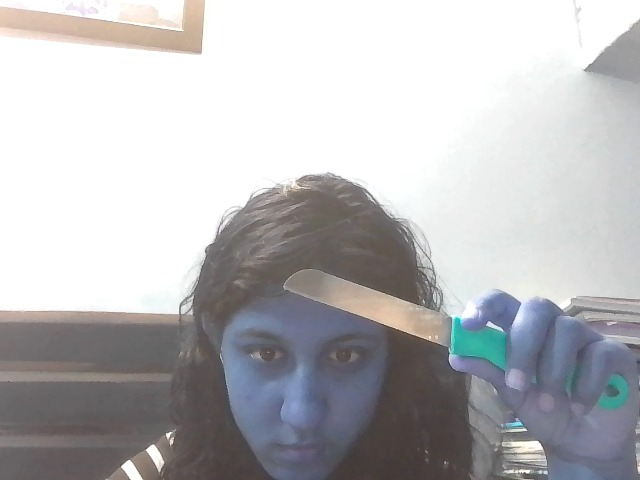

In [ ]:
# Install required libraries
!pip install opencv-python-headless
!pip install torch torchvision

import cv2
import torch
from torchvision import transforms
from PIL import Image
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np

# Load your custom-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device).eval()

# Define a function to capture images from webcam
def take_photo(filename='photo.jpg'):
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg');
        }
    ''')
    display(js)
    data = eval_js('takePhoto()')
    binary = b64decode(data.split(',')[1])
    img = np.frombuffer(binary, dtype=np.uint8)
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    return img

# Process the captured image with your custom-trained YOLOv5 model
try:
    img = take_photo()
    img = Image.fromarray(img)
    results = model(img)
    results.show()  # Show detections
    display(img)
except Exception as err:
    print(str(err))
